In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import itertools
import joblib

# Modelling Helpers
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Preprocessing

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Projet IA : FakeNews/test.csv")

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Projet IA : FakeNews/train.csv")

In [ ]:
df_train

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1      Ever get the feeling your life circles the rou...      0  
2      Why the Truth Might Get You Fired October 29, ...      1  
3      Videos 15 Civilians Killed In Single US Airstr...      1  
4      Print \nAn Iranian woman has been sentenced to...      1  
...                                                  ...    ...  
20795  Rapper T. I. unloaded on black celebrities who...      0  
20796  When the Green Bay Packers lost to the Washing...      0  
20797  The Macy’s of today grew from the union of sev...      0  
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1  
20799    David Swanson is an author, activist, journa...      1  

[20800 rows x 5 columns]

In [ ]:
df_test

id                                              title  \
0     20800  Specter of Trump Loosens Tongues, if Not Purse...   
1     20801  Russian warships ready to strike terrorists ne...   
2     20802  #NoDAPL: Native American Leaders Vow to Stay A...   
3     20803  Tim Tebow Will Attempt Another Comeback, This ...   
4     20804                    Keiser Report: Meme Wars (E995)   
...     ...                                                ...   
5195  25995  The Bangladeshi Traffic Jam That Never Ends - ...   
5196  25996  John Kasich Signs One Abortion Bill in Ohio bu...   
5197  25997  California Today: What, Exactly, Is in Your Su...   
5198  25998  300 US Marines To Be Deployed To Russian Borde...   
5199  25999  Awkward Sex, Onscreen and Off - The New York T...   

                       author  \
0            David Streitfeld   
1                         NaN   
2               Common Dreams   
3               Daniel Victor   
4     Truth Broadcast Network   
...                       ...   
5195               Jody Rosen   
5196      Sheryl Gay Stolberg   
5197             Mike McPhate   
5198                      NaN   
5199              Teddy Wayne   

                                                   text  
0     PALO ALTO, Calif.  —   After years of scorning...  
1     Russian warships ready to strike terrorists ne...  
2     Videos #NoDAPL: Native American Leaders Vow to...  
3     If at first you don’t succeed, try a different...  
4     42 mins ago 1 Views 0 Comments 0 Likes 'For th...  
...                                                 ...  
5195  Of all the dysfunctions that plague the world’...  
5196  WASHINGTON  —   Gov. John Kasich of Ohio on Tu...  
5197  Good morning. (Want to get California Today by...  
5198  « Previous - Next » 300 US Marines To Be Deplo...  
5199  Perhaps you’ve seen the new TV series whose pi...  

[5200 rows x 4 columns]

In [ ]:
df_train.shape

(20800, 5)

<Axes: ylabel='count'>

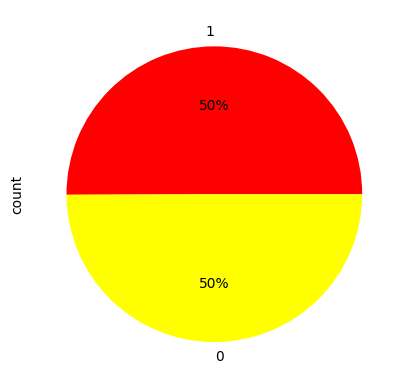

In [ ]:
#df_train.label.value_counts(normalize=True).plot(kind="pie")
df_train.label.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow"])

<ipython-input-9-c372f6be9978>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="label", data=df_train, palette=["yellow","red"])


<Axes: xlabel='count', ylabel='label'>

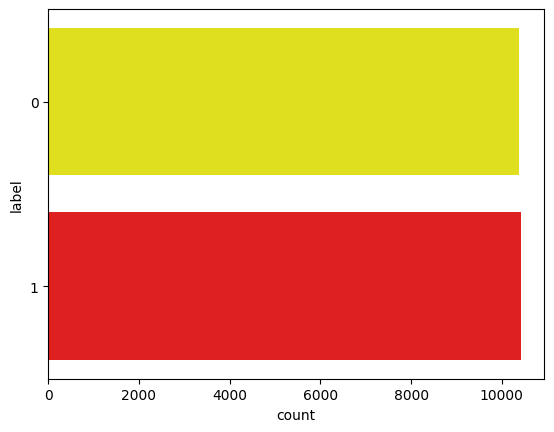

In [ ]:
sns.countplot(y="label", data=df_train, palette=["yellow","red"])

In [ ]:
def word_cloud(wd_list):
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        #stopwords=stopwords,
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=100,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");

In [ ]:
def word_cloud(wd_list):
    # Combinaison de tous les textes dans la liste en une seule chaîne
    all_words = ' '.join([str(text) for text in wd_list if pd.notnull(text)])  # Assurez-vous que les textes ne sont pas None

    # Création du WordCloud
    wordcloud = WordCloud(
        background_color='white',
        width=1600,
        height=800,
        random_state=21,
        colormap='jet',
        max_words=100,
        max_font_size=200
    ).generate(all_words)

    # Affichage du nuage de mots
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

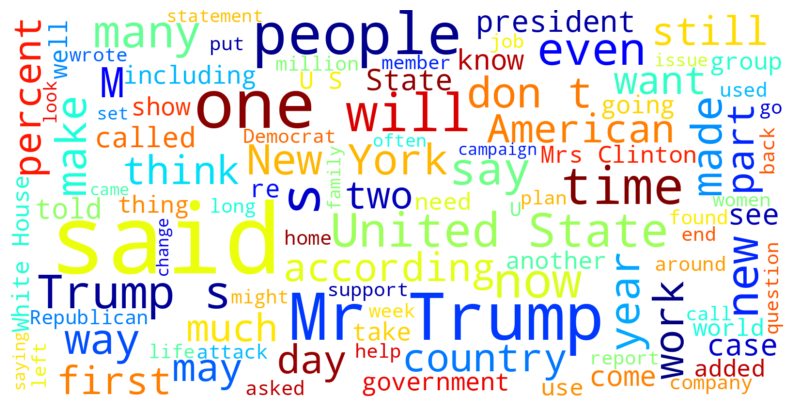

In [ ]:
word_cloud(df_train['text'][df_train['label'] == 0])

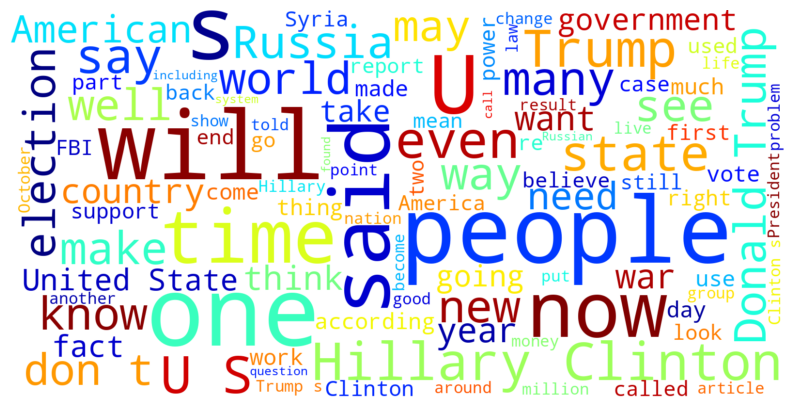

In [ ]:
word_cloud(df_train['text'][df_train['label'] == 1])

In [ ]:
# Parcourir les données et compter les mots
text = list(df_train['text'])
text

['House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing ema

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Téléchargement des ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


# Remplacement des abréviations
def remp_abreviation(phrase):
    # Vérification si la phrase est une chaîne de caractères
    if not isinstance(phrase, str):
        return ""

    phrase = phrase.lower()
    phrase = re.sub("won\'t", "will not", phrase)
    phrase = re.sub("can\'t", "can not", phrase)
    phrase = re.sub("cannot", "can not", phrase)
    phrase = re.sub("didnt", "did not", phrase)
    phrase = re.sub("couldnt", "could not", phrase)
    phrase = re.sub("doesnt", "does not", phrase)
    phrase = re.sub("dont", "do not", phrase)
    phrase = re.sub("hasnt", "has not", phrase)
    phrase = re.sub("hadnt", "had not", phrase)
    phrase = re.sub("havent", "have not", phrase)
    phrase = re.sub("ive", "i have", phrase)
    #phrase = re.sub("im", "i am", phrase)
    phrase = re.sub("wasnt", "was not", phrase)
    phrase = re.sub("werent", "were not", phrase)
    phrase = re.sub("'cause", "because", phrase)
    phrase = re.sub("cos", "because", phrase)
    phrase = re.sub("f\*\*k", "fuck", phrase)
    phrase = re.sub("f\*\*king", "fucking", phrase)
    phrase = re.sub("idk", "i do not know", phrase)

    # general
    phrase = re.sub("n\'t", " not", phrase)
    phrase = re.sub("n\'", " not", phrase)
    phrase = re.sub("' re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub("\'d", " would", phrase)
    phrase = re.sub("\'ll", " will", phrase)
    phrase = re.sub("\'t", " not", phrase)
    phrase = re.sub("\'ve", " have", phrase)
    phrase = re.sub(" m", " am ", phrase)
    phrase = re.sub(" u ", " you ", phrase)
    phrase = re.sub(" ur ", " your ", phrase)
    phrase = re.sub(" n ", " and ", phrase)

    return phrase

# Tokenization et nettoyage des symboles
def tokenizer_fct(sentence):
    sentence_clean = sentence.replace('-', ' ').replace('+', ' ').replace('/', ' ').replace('#', ' ')
    word_tokens = word_tokenize(sentence_clean)
    return word_tokens

# Filtrage des stop words
stop_w = list(set(stopwords.words('english'))) + ['[', ']', ',', '.', ':', '?', '(', ')']
def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w

# Conversion en minuscule et filtrage des mots non alphabétiques
def lower_start_fct(list_words):
    lw = [w.lower() for w in list_words if (not w.startswith("@")) and (not w.startswith("http"))]
    return lw

# Lemmatisation
def lemma_fct(list_words):
    lemmatizer = WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w

# Pipeline complet de préparation du texte
def transform_dl_fct(desc_text):
    desc_text = remp_abreviation(desc_text)  # Remplacement des abréviations en premier
    word_tokens = tokenizer_fct(desc_text)  # Tokenization
    #sw = stop_word_filter_fct(word_tokens)  # Filtrage des stop words (désactivé ou activé )
    lw = lower_start_fct(word_tokens)  # Conversion en minuscule
    lem_w = lemma_fct(lw)  # Lemmatisation (désactivé ou activé )
    transf_desc_text = ' '.join(lem_w)  # Combinaison des mots traités en une seule chaîne
    return transf_desc_text

# Test de la fonction
sample_text = "I can't believe this happened! It's incredible, isn't it?"
processed_text = transform_dl_fct(sample_text)
print(processed_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


i can not believe this happened ! it is incredible , is not it ?


In [ ]:
sample_text_test = df_test['text'][0]
processed_text_test = transform_dl_fct(sample_text_test)
processed_text_test

'palo alto , calif. — after year of scorning the political process , silicon valley ha leapt into the fray . the prospect of a president donald j. trump is pushing the tech community to am ove beyond it traditional role a donor and to embrace a new existence a agitator and activist . a distinguished venture capital firm emblazoned on it corporate home page an earthy epithet . one prominent tech chieftain say the consequence of am r. trump ’ s election would “ range between disastrous and terrible . ” another compare him to a dictator . and nearly 150 tech leader signed an open letter decrying am r. trump and his campaign of “ anger ” and “ bigotry . ” not quite all the action is . peter thiel , a founder of paypal and palantir who wa the first outside investor in facebook , spoke at the republican convention in july . the new york time reported on saturday that am r. thiel is giving $ 1 . 25 am illion to support am r. trump ’ s candidacy even a other supporter flee . ( he also recently

In [ ]:
df_train['text_dl'] = df_train['text'].apply(lambda x : transform_dl_fct(x))

In [ ]:
df_train

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                 text_dl  
0      house dem aide : we didn ’ t even see comey ’ ...  
1      ever get the feeling your life circle the roun...  
2      why the truth am ight get you fired october 29...  
3      video 15 civilian killed in single u airstrike...  
4      print an iranian woman ha been sentenced to si...  
...                                                  ...  
20795  rapper t. i. unloaded on black celebrity who a...  
20796  when the green bay packer lost to the washingt...  
20797  the am acy ’ s of today grew from the union of...  
20798  nato , russia to hold parallel exercise in bal...  
20799  david swanson is an author , activist , journa...  

[20800 rows x 6 columns]

In [ ]:
df_train['title_dl'] = df_train['title'].apply(lambda x : transform_dl_fct(x))

In [ ]:
df_train['author_dl'] = df_train['author'].apply(lambda x : transform_dl_fct(x))

In [ ]:
df_train

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                 text_dl  \
0      house dem aide : we didn ’ t even see comey ’ ...   
1      ever get the feeling your life circle the roun...   
2      why the truth am ight get you fired october 29...   
3      video 15 civilian killed in single u airstrike...   
4      print an iranian woman ha been sentenced to si...   
...                                                  ...   
20795  rapper t. i. unloaded on black celebrity who a...   
20796  when the green bay packer lost to the washingt...   
20797  the am acy ’ s of today grew from the union of...   
20798  nato , russia to hold parallel exercise in bal...   
20799  david swanson is an author , activist , journa...   

                                                title_dl  \
0      house dem aide : we didn ’ t even see comey ’ ...   
1      flynn : hillary clinton , big woman on campus ...   
2                    why the truth am ight get you fired   
3      15 civilian killed in single u airstrike have ...   
4      iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  rapper t.i . : trump a ’ poster child for whit...   
20796  n.f.l . playoff : schedule , am atchups and od...   
20797  macy ’ s is said to recei have takeover approa...   
20798  nato , russia to hold parallel exercise in balkan   
20799                        what keep the f 35 ali have   

                                         author_dl  
0                                    darrell lucus  
1                                  daniel j. flynn  
2                               consortiumnews.com  
3                                  jessica purkiss  
4                                   howard portnoy  
...            

In [ ]:
df_train['total_dl']=df_train['title_dl']+' '+df_train['author_dl']+' '+df_train['text_dl']

In [ ]:
df_train

id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiumnews.com   
3                                Jessica Purkiss   
4                                 Howard Portnoy   
...                                          ...   
20795                              Jerome Hudson   
20796                           Benjamin Hoffman   
20797  Michael J. de la Merced and Rachel Abrams   
20798                                Alex Ansary   
20799                              David Swanson   

                                                    text  label  \
0      House Dem Aide: We Didn’t Even See Comey’s Let...      1   
1      Ever get the feeling your life circles the rou...      0   
2      Why the Truth Might Get You Fired October 29, ...      1   
3      Videos 15 Civilians Killed In Single US Airstr...      1   
4      Print \nAn Iranian woman has been sentenced to...      1   
...                                                  ...    ...   
20795  Rapper T. I. unloaded on black celebrities who...      0   
20796  When the Green Bay Packers lost to the Washing...      0   
20797  The Macy’s of today grew from the union of sev...      0   
20798  NATO, Russia To Hold Parallel Exercises In Bal...      1   
20799    David Swanson is an author, activist, journa...      1   

                                                 text_dl  \
0      house dem aide : we didn ’ t even see comey ’ ...   
1      ever get the feeling your life circle the roun...   
2      why the truth am ight get you fired october 29...   
3      video 15 civilian killed in single u airstrike...   
4      print an iranian woman ha been sentenced to si...   
...                                                  ...   
20795  rapper t. i. unloaded on black celebrity who a...   
20796  when the green bay packer lost to the washingt...   
20797  the am acy ’ s of today grew from the union of...   
20798  nato , russia to hold parallel exercise in bal...   
20799  david swanson is an author , activist , journa...   

                                                title_dl  \
0      house dem aide : we didn ’ t even see comey ’ ...   
1      flynn : hillary clinton , big woman on campus ...   
2                    why the truth am ight get you fired   
3      15 civilian killed in single u airstrike have ...   
4      iranian woman jailed for fictional unpublished...   
...                                                  ...   
20795  rapper t.i . : trump a ’ poster child for whit...   
20796  n.f.l . playoff : schedule , am atchups and od...   
20797  macy ’ s is said to recei have takeover approa...   
20798  nato , russia to hold parallel exercise in balkan   
20799                        what keep the f 35 ali have   

                                         author_dl  \
0                                    darrell lucus   
1                                  daniel j. flynn   
2                               consortiumnews.com   
3                                  jessica purkiss   
4                                   howard portnoy   
...      

In [ ]:
df_train.to_csv('/content/drive/MyDrive/Projet IA : FakeNews/df_train.csv', index=False)

# Vectorisation

In [ ]:
# Dividing the training set by using train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train['total_dl'], df_train.label, test_size=0.20, random_state=0)

In [ ]:
# Initialize the `count_vectorizer`
count_vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
# Fit and transform the training data.
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test set
count_test = count_vectorizer.transform(X_test)

In [ ]:
#Initialize the `tfidf_vectorizer`
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
#Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
#Transform the test set
tfidf_test = tfidf_vectorizer.transform(X_test)

# Modélisation

## 1. Multinomial Naive Bayes with Count Vectorizer (BagofWords)

In [ ]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
acc_nb_count = metrics.accuracy_score(y_test, pred_nb_count)
print(acc_nb_count)

0.9391826923076924


In [ ]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,1,.05):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(count_train, y_train)
    pred_tune = nb_classifier_tune.predict(count_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.00 Score: 0.90769
Alpha: 0.05 Score: 0.93726
Alpha: 0.10 Score: 0.93918
Alpha: 0.15 Score: 0.93702
Alpha: 0.20 Score: 0.93702
Alpha: 0.25 Score: 0.93582
Alpha: 0.30 Score: 0.93582
Alpha: 0.35 Score: 0.93389
Alpha: 0.40 Score: 0.93317
Alpha: 0.45 Score: 0.93317
Alpha: 0.50 Score: 0.93245
Alpha: 0.55 Score: 0.93173
Alpha: 0.60 Score: 0.92933
Alpha: 0.65 Score: 0.92788
Alpha: 0.70 Score: 0.92500
Alpha: 0.75 Score: 0.92308
Alpha: 0.80 Score: 0.92067
Alpha: 0.85 Score: 0.91827
Alpha: 0.90 Score: 0.91659
Alpha: 0.95 Score: 0.91659


- Le meilleur score est pour un alpha = 0.15 pour 0.93702

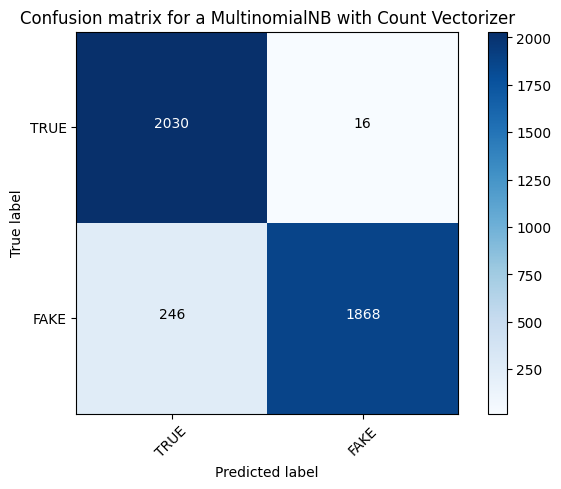

In [ ]:
# Let's re-run our fine-tuned model and plot the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.15)
nb_classifier.fit(count_train, y_train)
pred_nb_count = nb_classifier.predict(count_test)
cm = metrics.confusion_matrix(y_test, pred_nb_count, labels=[0,1])

# Creating a function that outputs a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


plot_confusion_matrix(cm, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Count Vectorizer')

## 2. Multinomial Naive Bayes with TF-IDF Vectorizer

In [ ]:
nb_classifier = MultinomialNB(alpha = 0.1)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
acc_nb_tfidf = metrics.accuracy_score(y_test, pred_nb_tfidf)
print(acc_nb_tfidf)

0.9197115384615384


In [ ]:
# tune the hyperparameter alpha for the naive bayes classifier
for alpha in np.arange(0,0.1,.01):
    nb_classifier_tune = MultinomialNB(alpha=alpha)
    nb_classifier_tune.fit(tfidf_train, y_train)
    pred_tune = nb_classifier_tune.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred_tune)
    print("Alpha: {:.2f}  Score: {:.5f}".format(alpha, score))

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.00  Score: 0.90120
Alpha: 0.01  Score: 0.94111
Alpha: 0.02  Score: 0.94014
Alpha: 0.03  Score: 0.93870
Alpha: 0.04  Score: 0.93510
Alpha: 0.05  Score: 0.93173
Alpha: 0.06  Score: 0.92812
Alpha: 0.07  Score: 0.92548
Alpha: 0.08  Score: 0.92308
Alpha: 0.09  Score: 0.92115


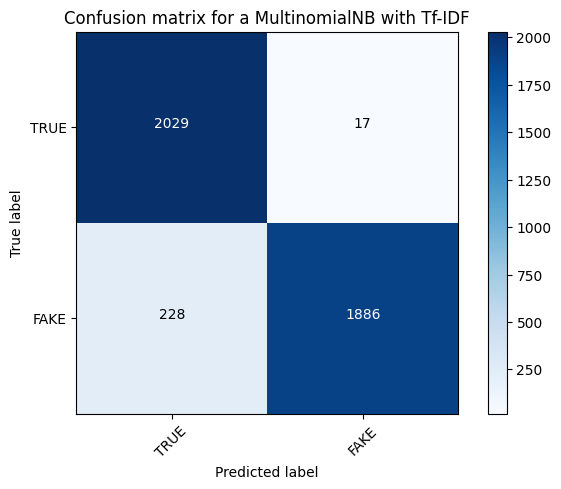

In [ ]:
# Let's run the optimized model with best value of hyperparameter and check the confusion matrix
nb_classifier = MultinomialNB(alpha = 0.01)
nb_classifier.fit(tfidf_train, y_train)
pred_nb_tfidf = nb_classifier.predict(tfidf_test)
cm2 = metrics.confusion_matrix(y_test, pred_nb_tfidf, labels=[0,1])
plot_confusion_matrix(cm2, classes=['TRUE','FAKE'], title ='Confusion matrix for a MultinomialNB with Tf-IDF')

## 3. Logistic Regression with TF-IDF Vectorizer



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9759615384615384


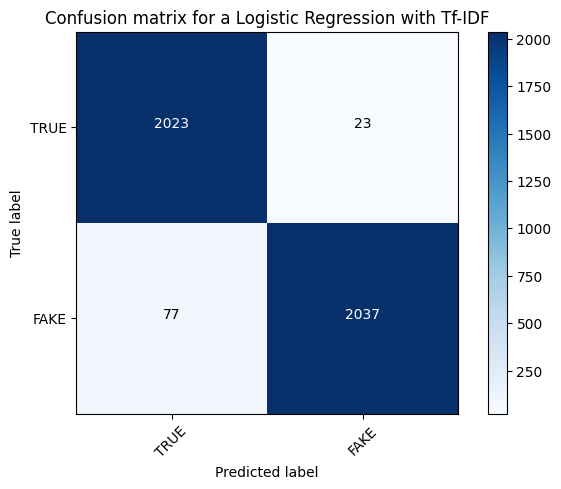

In [ ]:
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
pred_logreg_tfidf = logreg.predict(tfidf_test)
pred_logreg_tfidf_proba = logreg.predict_proba(tfidf_test)[:,1]
acc_logreg_tfidf = metrics.accuracy_score(y_test,pred_logreg_tfidf)
print("Accuracy:", acc_logreg_tfidf)
cm4 = metrics.confusion_matrix(y_test, pred_logreg_tfidf, labels=[0,1])
plot_confusion_matrix(cm4, classes=['TRUE','FAKE'], title ='Confusion matrix for a Logistic Regression with Tf-IDF')

## 4. RandomForestClassifier with TF-IDF Vectorizer



Accuracy: 0.9242788461538461


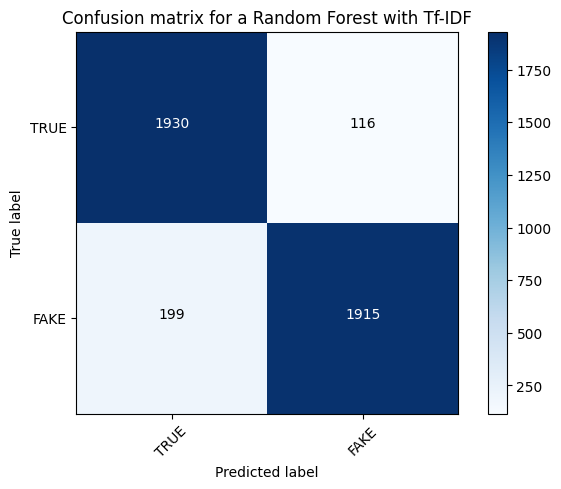

In [ ]:
# RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(tfidf_train, y_train)
pred_rf_tfidf = rf.predict(tfidf_test)
acc_rf_tfidf = metrics.accuracy_score(y_test, pred_rf_tfidf)
print("Accuracy:", acc_rf_tfidf)
cm_rf = metrics.confusion_matrix(y_test, pred_rf_tfidf, labels=[0, 1])
plot_confusion_matrix(cm_rf, classes=['TRUE', 'FAKE'], title='Confusion matrix for a Random Forest with Tf-IDF')

plt.show()

# Conclusion

Le modèle qui obtient le meilleur score est Logistic regression avec une accurancy de **0.9759615384615384**

In [ ]:
# Chemin de sauvegarde du modèle
save_path = '/content/drive/MyDrive/Projet IA : FakeNews/logreg_model.pkl'

# Sauvegarde du modèle entraîné
joblib.dump(logreg, save_path)

['/content/drive/MyDrive/Projet IA : FakeNews/logreg_model.pkl']